### **Lab Assignment 1 - Jack Travers**
#### Student ID: 200013389
#### GitHub URL: https://github.com/Jacktravers81/PY4SA23_Assignment

### **Section One: Python Basics**

#### **Task 1:** Create an If...Else statement that will test whether a number is divisible by three

In [79]:
def divisible (n):
    if n % 3 == 0:
        print (n, "is divisible by 3")
    else:
        print (n, "is not divisible by 3")
divisible (11)

11 is not divisible by 3


#### **Task 2:** Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry)

In [43]:
fruit = ["apple", "orange", "pear", "kiwi", "strawberry"]

def library(check):
    if check in fruit:
        print (check, "is acceptable")
    else:
        print (check, "is not acceptable")

library("berry")

berry is not acceptable


#### **Task 3:** Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists

In [191]:
import math
from math import *
from collections import namedtuple
coord = namedtuple("coord", "lat, lon")

london = coord(51.50722,-0.1275)
edi = coord(55.9520600,-3.1964800)
R = 6371

def haversine(origin, destination):
    latitude = math.radians(destination.lat - origin.lat)
    longitude = math.radians(destination.lon - origin.lon)
    a = math.sin(latitude/2)**2 + math.cos(latitude) * math.cos(latitude) * math.sin(longitude - longitude/2)**2
    c = 2 * math.atan2(sqrt(a), sqrt(1-a))
    d = R * c
    
    return d

print (haversine(london, edi))

600.1236437504134


### **Section Two: Pandas and NumPy**

#### **Question 1:** How many trees are of the Quercus or Acer genus?

In [79]:
import numpy as np 
import pandas as pd 
trees_df = pd.read_csv("Assignment 2 Data\portland_park_trees.csv", index_col=30)

trees_df.value_counts("Genus")

Genus
Pseudotsuga      6783
Acer             3586
Quercus          2089
Prunus           1333
Pinus             983
                 ... 
Eucommia            1
Eriobotrya          1
Daphniphyllum       1
Schima              1
Illicium            1
Length: 117, dtype: int64

Answer:
*Acer*: 3586,
*Quercus*: 2089

#### **Question 2:** How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [91]:
import numpy as np 
import pandas as pd 
trees_df = pd.read_csv("Assignment 2 Data\portland_park_trees.csv")

just_acer = trees_df[(trees_df["Genus"]=="Acer") & (trees_df["DBH"]>50)][["Genus", "DBH"]]
print(len(just_acer))

just_quercus = trees_df[(trees_df["Genus"]=="Quercus") & (trees_df["DBH"]>50)][["Genus", "DBH"]]
print(len(just_quercus))


44
80


Answer: *Acer*: 44, *Quercus*: 80

#### **Question 3:** Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus? 

In [89]:
import numpy as np 
import pandas as pd 
trees_df = pd.read_csv("Assignment 2 Data\portland_park_trees.csv", sep=",", header=0, encoding="ISO-8859-1")
trees_df.columns = [column.replace(" ", "_") for column in trees_df.columns]
tree_stats = pd.DataFrame()
tree_stats ["Mean"] = trees_df.groupby("Genus")['DBH'].mean()
tree_stats

acer_stats = trees_df[trees_df["Genus"]=="Acer"][["Genus", "DBH"]].mean()
quercus_stats = trees_df[trees_df["Genus"]=="Quercus"][["Genus", "DBH"]].mean()
fraxinus_stats = trees_df[trees_df["Genus"]=="Fraxinus"][["Genus", "DBH"]].mean()

print(acer_stats)
print(quercus_stats)
print(fraxinus_stats)


DBH    18.419085
dtype: float64
DBH    23.568238
dtype: float64
DBH    11.03361
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_18164\1292205718.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  acer_stats = trees_df[trees_df["Genus"]=="Acer"][["Genus", "DBH"]].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_18164\1292205718.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  quercus_stats = trees_df[trees_df["Genus"]=="Quercus"][["Genus", "DBH"]].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_18164\1292205718.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a fut

Answer: *Acer* mean DBH: 18.4, *Quercus* mean DBH: 23.6, *Fraxinus* mean DBH: 11

#### **Question 4:** How many different species of trees are recorded in the Acer genus?

In [93]:
just_acer["Species"].nunique()

20

Answer: Different *Acer* species: 20

#### **Question 5:** cities.csv dataframe tasks

**Part 1:** Calculate a new column named "pop_M" (population in millions), by transforming the
"pop" (population) column

In [121]:
import pandas as pd 
cities_df = pd.read_csv("Assignment 2 Data\world_cities.csv")
cities_df["pop_M"] = (cities_df["pop"]/1000000)

city country    lat    lon  capital     pop_M
33285        San'a   Yemen  15.38  44.21        1  1.921589
36905       Ta'izz   Yemen  13.60  44.04        0  0.690689
43305  al-Hudaydah   Yemen  14.80  42.95        0  0.677315
390           Aden   Yemen  12.79  45.03        0  0.625361
43432   al-Mukalla   Yemen  14.54  49.13        0  0.307033

**Part 2:** Remove the original "pop" column

In [ ]:
cities_df.drop("pop", axis=1, inplace=True)
cities_j = cities_df[cities_df.city.str.startswith('J')]
cities_j.head(1)

**Part 3:** Choose/subset a city that starts with the same letter as your first name (for example,
"Mexico City" if your first name is Michael)

In [ ]:
cities_j = cities_df[cities_df.city.str.startswith('J')]
cities_j.head(1)

**Part 4:** Subset the five biggest (i.e., largest population sizes) cities from the country where your
selected city is

In [ ]:
(cities_df.query("country == 'Yemen'")
.sort_values("pop_M", ascending=False)
.head(5))

### **Section Three: Python Data Visualization**

#### **Graph 1:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis
and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and
“TreeHeight” attributes.)

<AxesSubplot: xlabel='DBH', ylabel='TreeHeight'>

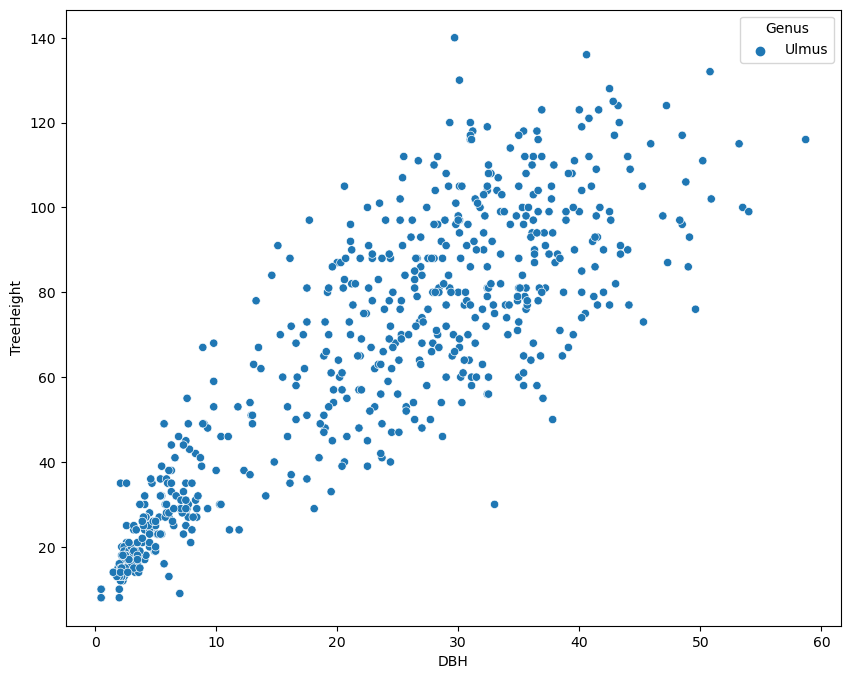

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

trees_df = pd.read_csv("Assignment 2 Data\portland_park_trees.csv")
trees_df.columns =[column.replace(" ", "_") for column in trees_df.columns]
trees_df.tail(5)

ulmus_df = trees_df[trees_df["Genus"]=="Ulmus"][["Genus", "DBH", "TreeHeight"]]

import seaborn as sns
sns.scatterplot(x="DBH", y="TreeHeight", data=ulmus_df, hue="Genus")

#### **Graph 2:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

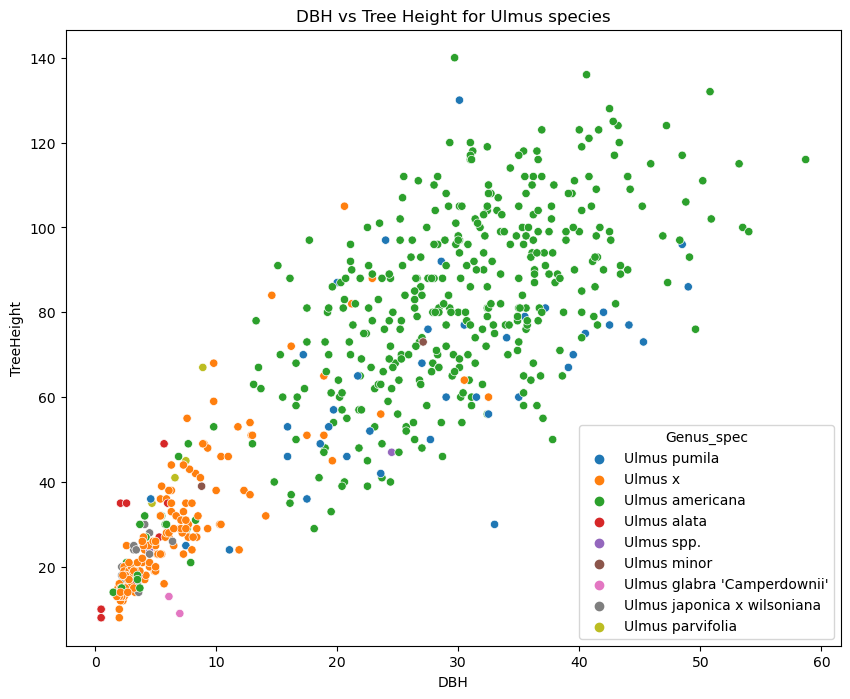

In [24]:
ulmus_df = trees_df[trees_df["Genus"]=="Ulmus"][["Genus", "DBH", "TreeHeight", "Genus_spec"]]
sns.scatterplot(x="DBH", y="TreeHeight", data=ulmus_df, hue="Genus_spec")
plt.title('DBH vs Tree Height for Ulmus species')
plt.show()

#### **Graph 3:** Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot)

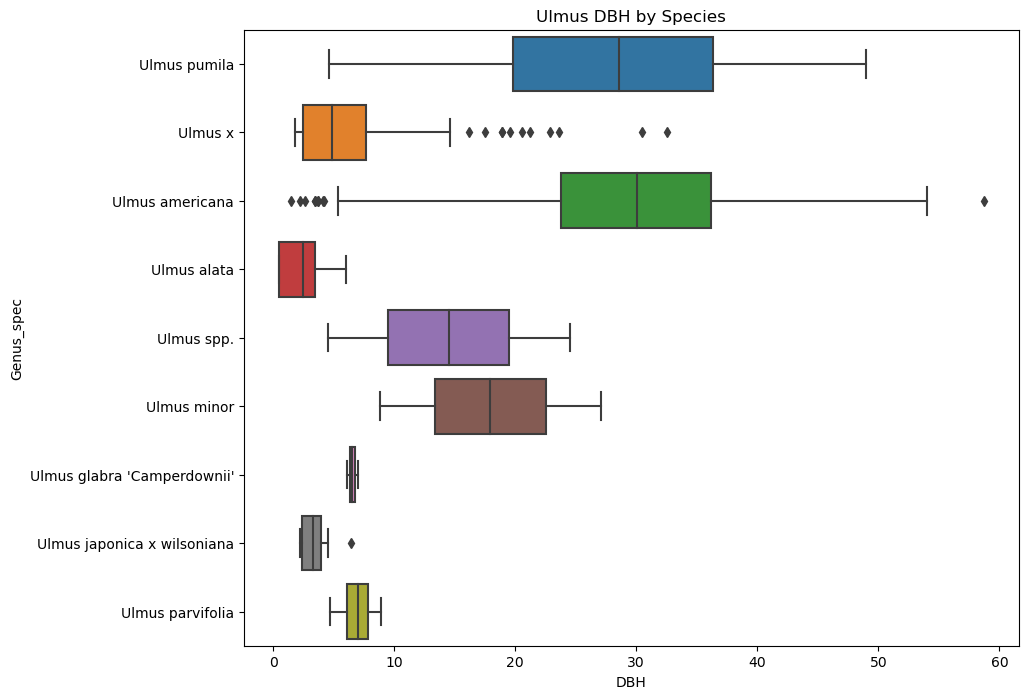

In [25]:
sns.boxplot(data=ulmus_df, x='DBH', y='Genus_spec')
plt.title('Ulmus DBH by Species')
plt.show()

#### **Graph 4:** Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs

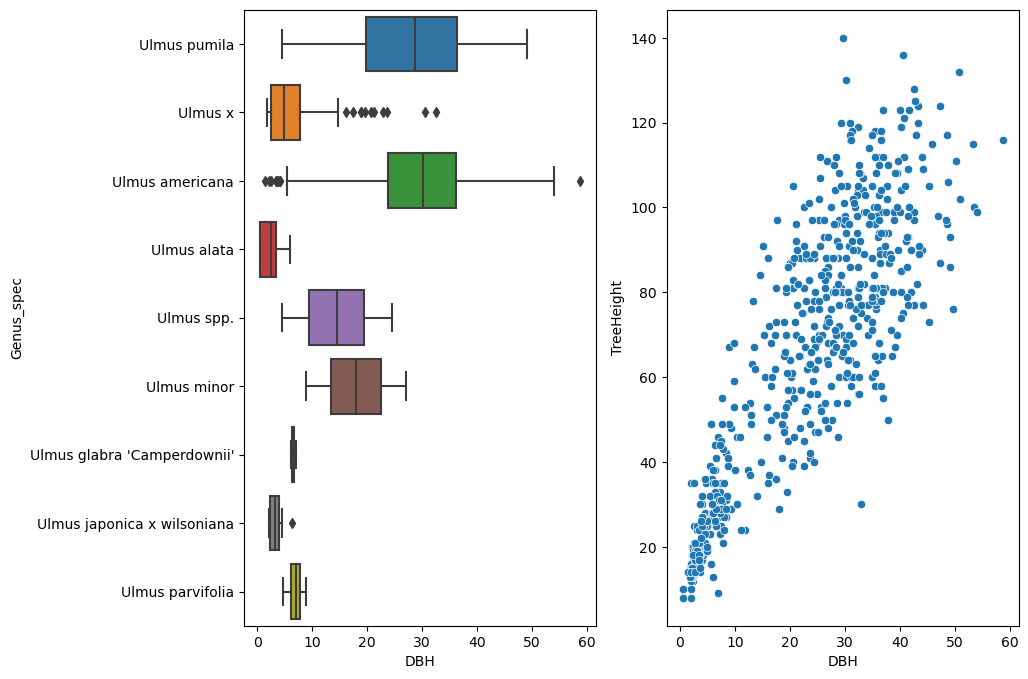

In [90]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(x="DBH", y="TreeHeight", data=ulmus_df, ax=axs[1])
sns.boxplot(x='DBH',y='Genus_spec', data=ulmus_df, ax=axs[0])
plt.show()

### **Section Four: Python GeoPandas**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

#### **Task 1:** Read the selected dataset as GeoPandas DataFrame

In [111]:
pine_df = gpd.read_file('Caledonian_Pinewood_Inventory_-7480727194788417871\Caledonian_Pinewood_Inventory.shp')
pine_df.head(5)

OBJECTID_1  FEATCODE             FEATDESC  PINEID       PINENAME       NGR  \
0           1      2060  Caledonian Pinewood      10     Loch Clair  NG990575   
1           2      2060  Caledonian Pinewood      11      Shieldaig  NG823524   
2           3      2060  Caledonian Pinewood      12   Easan Dorcha  NH010522   
3           4      2060  Caledonian Pinewood      13  Achnashellach  NH035470   
4           5      2060  Caledonian Pinewood      14        Taodail  NG950422   

   COREAREA  REGENAREA  BUFFERAREA  TOTALAREA        BIOCHEM  \
0       126        368        2033       2527     North West   
1       103        198         947       1248     North West   
2        47        207         712        966  North Central   
3        65        178        1332       1575  North Central   
4         3         19         178        200  North Central   

                                            geometry  
0  MULTIPOLYGON (((-594931.671 7873561.838, -5949...  
1  MULTIPOLYGON (((-628726.562 7866587.942, -6287...  
2  MULTIPOLYGON (((-591082.652 7867423.034, -5910...  
3  MULTIPOLYGON (((-590230.609 7857358.627, -5903...  
4  POLYGON ((-603161.487 7847307.232, -603174.574...

#### **Task 2:** Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset

<AxesSubplot: >

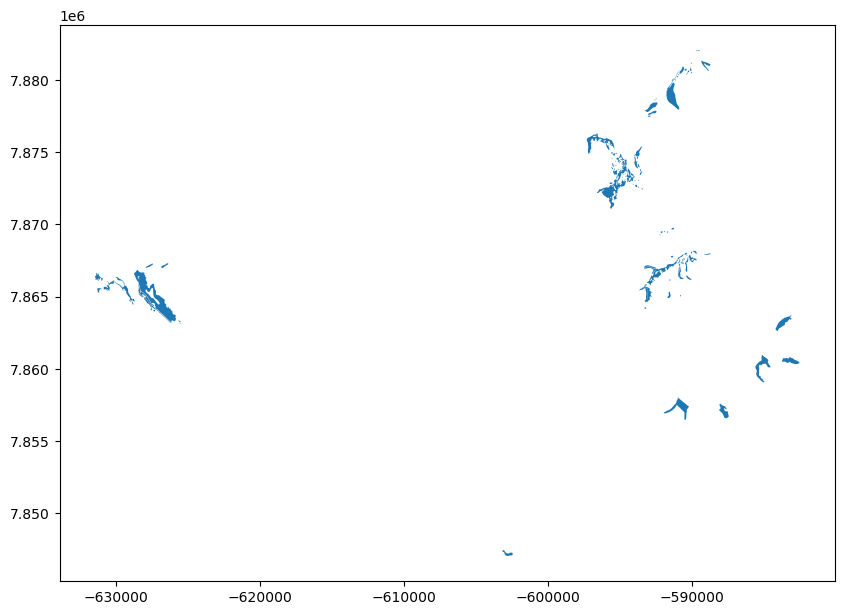

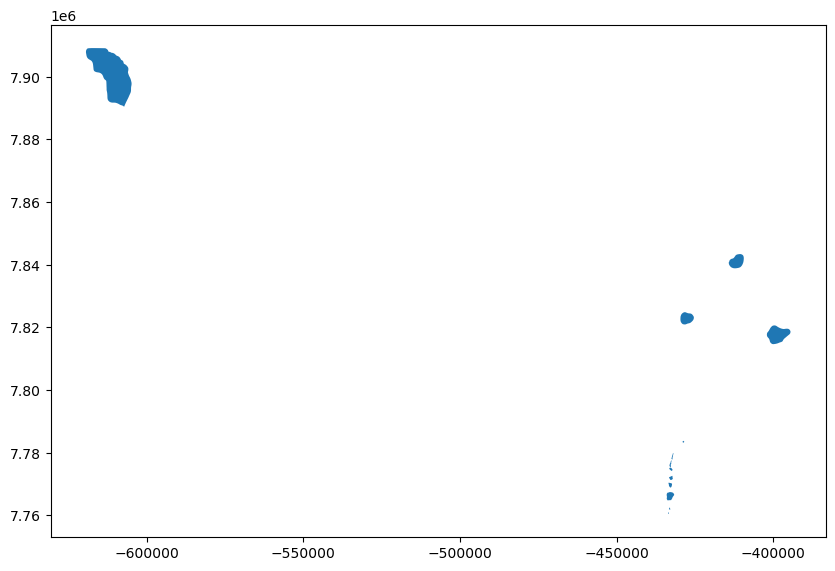

In [80]:
pine_df.head(5).plot()
pine_df.tail(5).plot()

#### **Task 3:** Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip


In [94]:
pine_df.explore(column="FEATDESC", cmap='RdYlBu', tooltip=True)

#### **Task 4:** What is the Coordinate Reference System of the selected dataset?

In [82]:
pine_prj = gpd.read_file('Caledonian_Pinewood_Inventory_-7480727194788417871\Caledonian_Pinewood_Inventory.shp')
pine_prj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### **Task 5:** How many features does the selected dataset contain?


In [93]:
pine_df.shape

(259, 12)

Answer: Features = rows, pines_df has 259 rows

#### **Task 6:** Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute

In [99]:
glenaffric_df = pine_df['PINENAME'] == 'Glen Affric'
glenaffric_gdf = pine_df[glenaffric_df]
glenaffric_gdf.shape

(4, 12)

#### **Task 7:** Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute

In [132]:
totalarea_gdf = pine_df[pine_df['TOTALAREA'] > 1000]
totalarea_gdf.shape

(115, 12)

#### **Task 8:** Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map

c:\Users\User\miniconda3\envs\py4sa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot: >

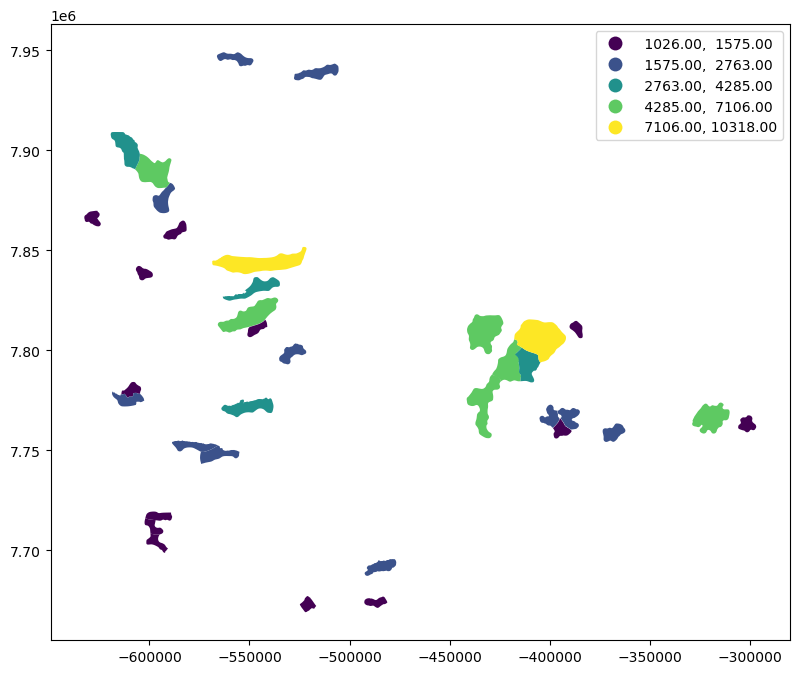

In [160]:
import mapclassify

totalarea_gdf.plot(
    column="TOTALAREA", 
    scheme="natural_breaks",
    k=5, 
    legend=True)

### **Section Five: Python Rasterrio**

#### **Task 1:** Read the file as a rasterio dataset

In [165]:
import rasterio as rio
elev = rio.open('Assignment 2 Data\elev.tif')

#### **Task 2:** What is the CRS of the dataset?


In [164]:
print(elev.crs)

EPSG:32617


#### **Task 3:** Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset


In [169]:
print(elev.count)
print(elev.bounds)
print(elev.crs)

1
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617


#### **Task 4:** Create a plot/map of the raster dataset


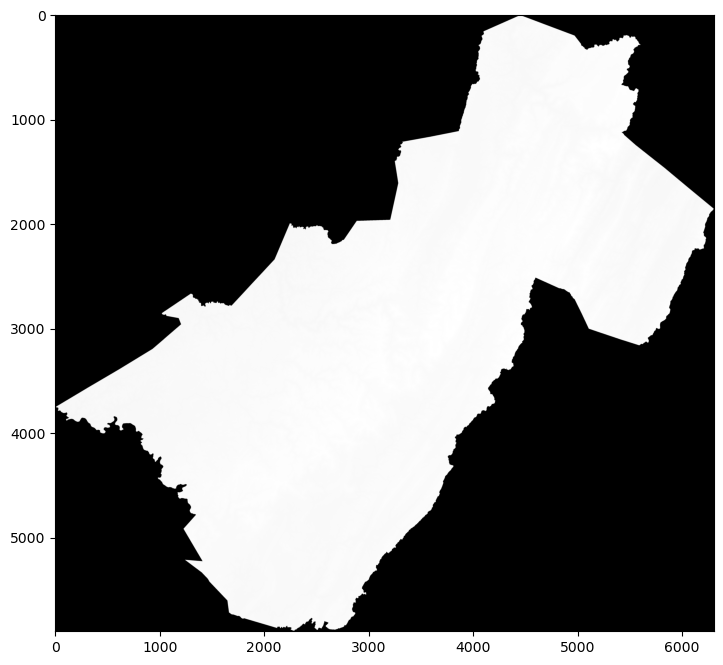

In [181]:
elev_arr = elev.read(1)
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray")

#### **Task 5:** Create Histograms from the raster

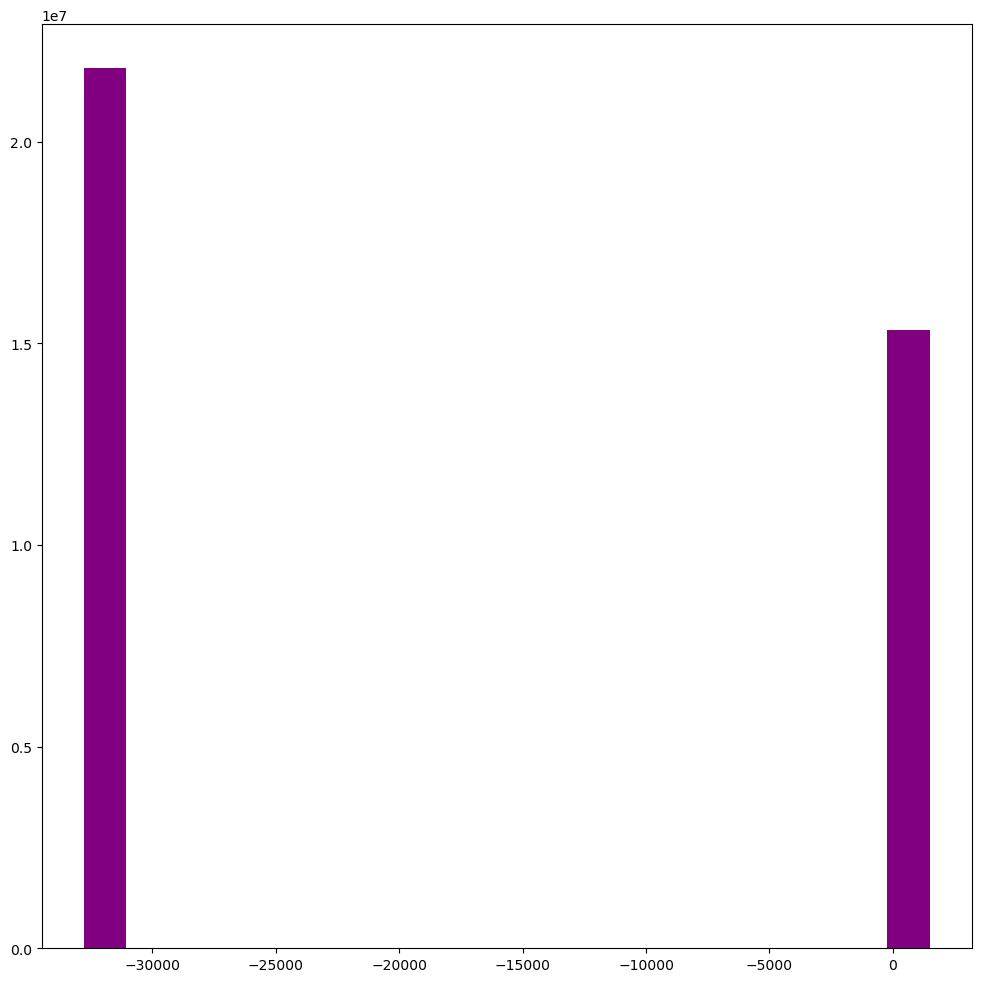

In [206]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

ep.hist(elev_arr)
plt.show()